# EDA for broke yet ambitious students

If you're like me (unemployed), and want to use data to get some insights on some strategic places to get a first internship, here are some insights.

Feel free to use this notebook and keep going with the analysis.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
data_path = '/kaggle/input/thousand-ml-jobs-in-usa/1000_ml_jobs_us.csv'
df = pd.read_csv(data_path, encoding='utf-8')
print('Data loaded successfully. Data shape:', df.shape)

Data loaded successfully. Data shape: (997, 10)


In [3]:
df.isnull().sum()

Unnamed: 0                    0
job_posted_date               0
company_address_locality     47
company_address_region      113
company_name                  0
company_website              14
company_description          12
job_description_text          1
seniority_level               9
job_title                     0
dtype: int64

In [4]:
df['seniority_level'].unique()

array(['Internship', 'Mid-Senior level', 'Entry level', 'Not Applicable',
       'Associate', nan, 'Executive', 'Director'], dtype=object)

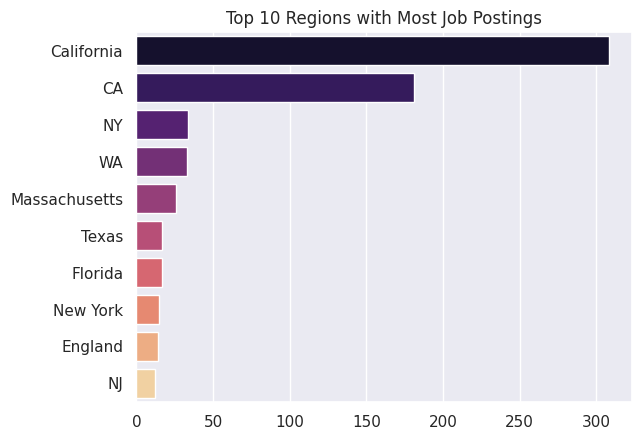

In [5]:
sns.set_theme(style='darkgrid')

top_regions = df['company_address_region'].value_counts().nlargest(10).index
df_top = df[df['company_address_region'].isin(top_regions)]

sns.countplot(y='company_address_region', data=df_top, palette='magma', order=top_regions)
plt.title('Top 10 Regions with Most Job Postings')
plt.ylabel('')
plt.xlabel('')
plt.show()


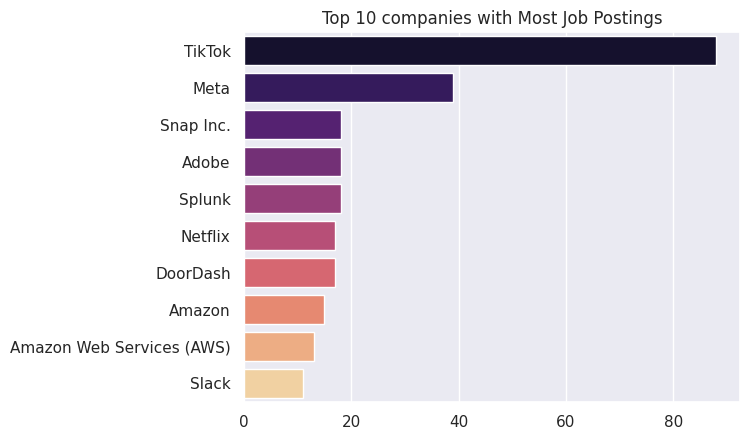

In [6]:
top_companies = df['company_name'].value_counts().nlargest(10).index
df_top_c = df[df['company_name'].isin(top_companies)]

sns.countplot(y='company_name', data=df_top, palette='magma', order=top_companies)
plt.title('Top 10 companies with Most Job Postings')
plt.xlabel('')
plt.ylabel('')
plt.show()


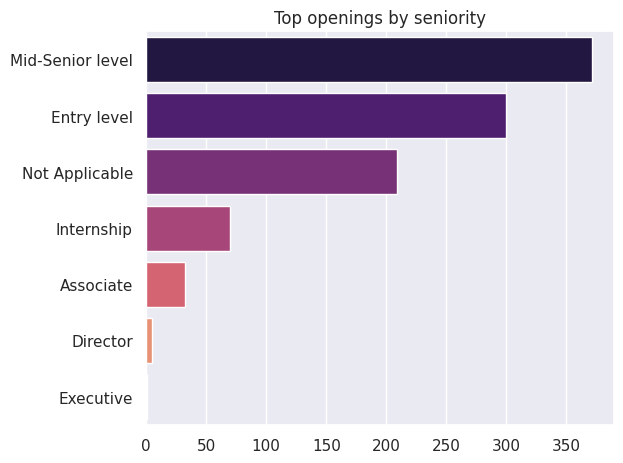

In [7]:
sns.countplot(y='seniority_level', data=df, order=df['seniority_level'].value_counts().index, palette='magma')
plt.title("Top openings by seniority")
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.show()


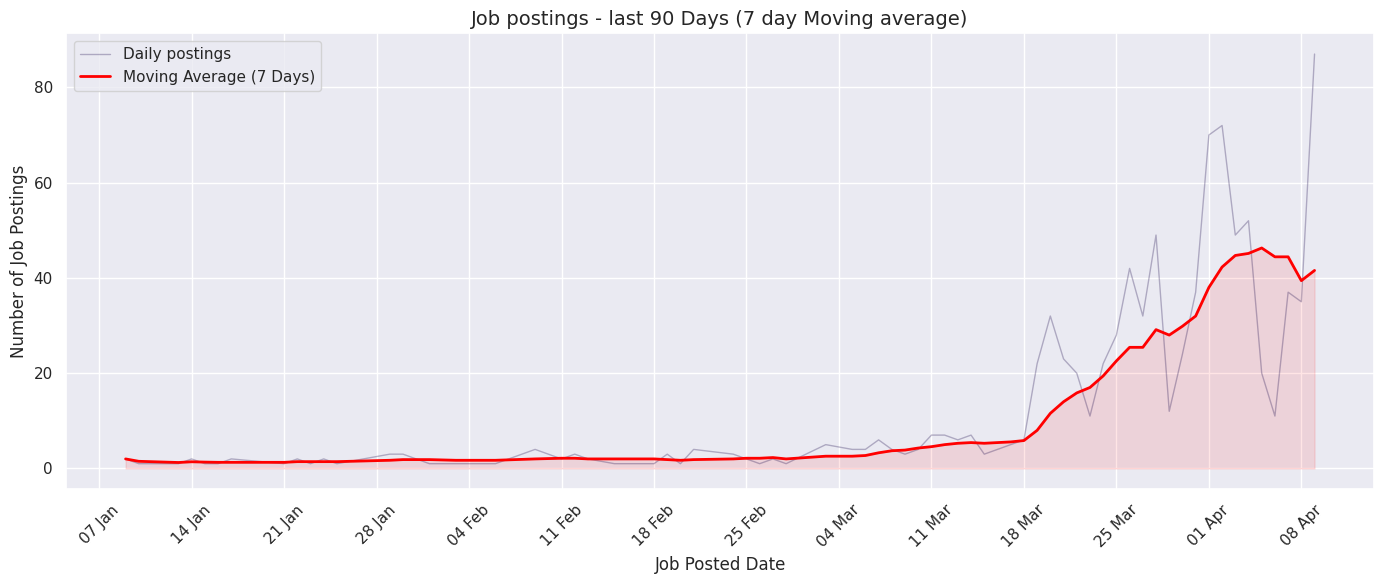

In [8]:
import matplotlib.dates as mdates

sns.set_theme(style='darkgrid', palette='magma')

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

jobs_by_date = df['job_posted_date'].value_counts().sort_index()
jobs_by_date = jobs_by_date[jobs_by_date > 0]

cutoff = jobs_by_date.index.max() - pd.Timedelta(days=90)
jobs_recent = jobs_by_date[jobs_by_date.index >= cutoff]

rolling_avg = jobs_recent.rolling(window=7, min_periods=1).mean()

plt.figure(figsize=(14, 6))
plt.plot(jobs_recent.index, jobs_recent.values, label='Daily postings', alpha=0.3, linewidth=1)
plt.plot(rolling_avg.index, rolling_avg.values, label='Moving Average (7 Days)', color='red', linewidth=2)
plt.fill_between(rolling_avg.index, rolling_avg.values, alpha=0.1, color='red')

plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))

plt.title('Job postings - last 90 Days (7 day Moving average)', fontsize=14)
plt.xlabel('Job Posted Date')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# Top 10 Companies Offering Internships

Where to look at if your trying to break into the industry.


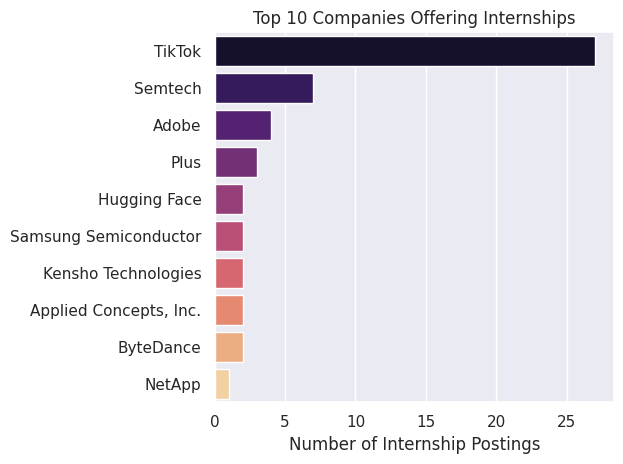

In [9]:
df_intern = df[df['seniority_level'].str.lower() == 'internship']

top_intern_companies = df_intern['company_name'].value_counts().nlargest(10)

sns.barplot(x=top_intern_companies.values, y=top_intern_companies.index, palette='magma')
plt.title("Top 10 Companies Offering Internships")
plt.xlabel("Number of Internship Postings")
plt.ylabel("")
plt.tight_layout()
plt.show()


#  Internship postings over time

Are students cooked?


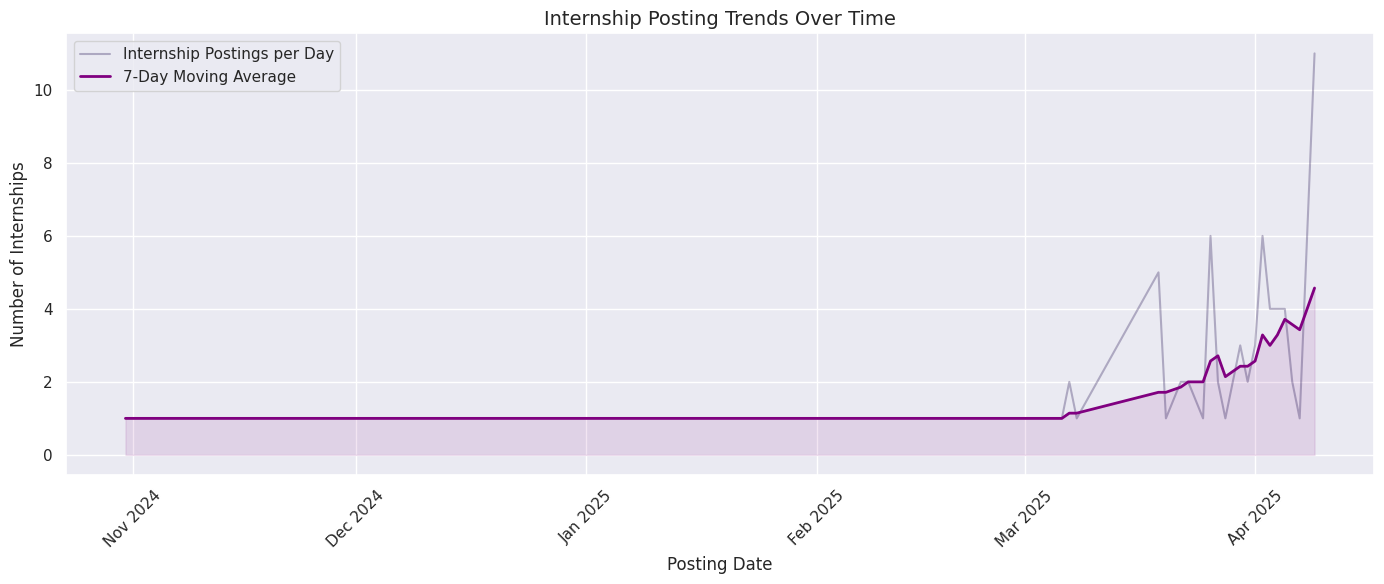

In [10]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df_intern = df[df['seniority_level'].str.lower() == 'internship']

interns_by_date = df_intern['job_posted_date'].value_counts().sort_index()
interns_by_date = interns_by_date[interns_by_date > 0]

rolling = interns_by_date.rolling(window=7, min_periods=1).mean()

plt.figure(figsize=(14, 6))
sns.set_style(style='darkgrid')
plt.plot(interns_by_date.index, interns_by_date.values, alpha=0.3, label='Internship Postings per Day')
plt.plot(rolling.index, rolling.values, color='purple', linewidth=2, label='7-Day Moving Average')
plt.fill_between(rolling.index, rolling.values, alpha=0.1, color='purple')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

plt.title("Internship Posting Trends Over Time", fontsize=14)
plt.xlabel("Posting Date")
plt.ylabel("Number of Internships")
plt.legend()
plt.tight_layout()
plt.show()

### Nah